# Problemas de valor inicial

Un problema de valor inicial é unha ecuación diferencial ordinaria da forma $y'(t) = f (y, t)$  con $y (0) = c$, onde $y$ podeter un valor único ou varios valores.

A idea é que especifiques o punto de partida dun sistema e as regras que rexen o sistema e fagas a simulación a partir de aí.

## A túa reserva natural de cebras

Poñamos quie eres un entusiasta das [cebras](https://gl.wikipedia.org/wiki/Cebra) e decides montar un santuario para cebras na túa finca.

## Problema de crecemento

As túas cebras van tendo descendencia co tempo. Isto é manexable ó principio da ubicación das mesmas na zoa. Non obstante, a cantidade de zerbas que podes alimentar é limitada e queres adiviñar que pasará se deixas as cousas sen control. Intentaremos escribir un programa para simular o teu problema de cebra.
$$
z_1 = z_0 + \Delta(z_0)
$$
onde $\Delta(z_0)$ = $\alpha z_0$. A túa estimación inicial é de $\alpha$ = 0.02.

Podemos escribir isto como unha ecuación diferencial

$$
z’(t) = \alpha z(t)
$$
Agora é hora de "disparar" con [python](www.python.org) para atopar unha solución desa ecuación diferencial. Resolveremos o problema de valor inicial con [ivp]([scipy.integrate.solve_ivp — SciPy v1.5.4 Reference Guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html))_ivp de [scipy.integrate]([Integration (scipy.integrate) — SciPy v1.5.4 Reference Guide](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)): trátase dunha librería de alto nivel con moitas opcións para resolver problemas de valor inicial. Os argumentos importantes a proporcionar son:

* **f(t,y)**: unha funcióna python que devolve o valor do lado dereito da ecuación diferencial e que pode ser unha función de valores múltiples.
* **t_span**: unha tupla $(t_0,t_1)$ que da os tempos de partida e teerminación da simulación
* **y<sub>0</sub>**: o estado do sistema a tempo $t_0$

**solve_ivp** fai moito traballo por nos: decide un algoritmo de respaldo, escolle o paso de tempo, etc. 

En algúns casos, pode sermos útil especificar **t_eval**, o que dá unha serie de puntos para avaliar a función.


As cousas non pintan ben. Non hai forma de que poidas permitirte alimentar tal cantidade de cebras. Haberá que facer eleccións algo...
### A solution natural

Ao publicar un anuncio de _Se venden cebras_ en milanuncios, ves outro anuncio dunha familia de leóns que necesitan unha casa. Séntese mal polos leóns e dáse conta de que pode usalos para resolver o seu problema das cebras. Non obstante, antes de meterte en denzas, quere asegurarse de que os leóns non comerán todas as cebras (só quere manter a poboación controlada, non exterminada). Le un pouco sobre como poden interactuar os leóns e as cebras e decides usar un [modelo Predator-Prey](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).
1. As cebras seguirán tendo descendencua a unha velocidade $\alpha$.
2. Un león atrapará e comerá 1 de cada $100$ cebras que vexa. O número de cebras que ve un león depende da poboación de cebras, denotaremos a taxa á que un león atopa unha única cebra nun mes como $\beta$.
3. Por cada 5 cebras que comen os leóns nace un leonciño.
4. Os leóns morren de vellez a un ritmo de $\gamma$

Usaremos $x$ para denotar o número de lións, e $z$ para o número de cebras. A cantidade na que cambia a poboación de cebras cada mes é $\Delta_z(z,x) = \alpha z - \frac{\beta}{100} x z$. A cantidade na que cambia a poboación de leóns cada mes é$\Delta_x(x,z) = \frac{\beta}{500} x z - \gamma x$.  

Para resolvee este problema, podemos usar un vector $y = [x, z]^T$, e o seguinte sistema de ODEs:
$$
\begin{align*}
y_0'(t) & = & \frac{\beta}{500} y_0 y_1 - \gamma y_0\\
y_1'(t) & = & \alpha y_1 - \frac{\beta}{100} y_0 y_1
\end{align*}
$$
Se estima que $\gamma$ é $0.02$, e $\beta$ $1.0$.

Teu plan é empezar con 5 lións e 50 cebras.

1. Resolve numéricamente o sistema de ecuacións e representa a variación de cebras e lións co tempo.
2. Te decatas de que os lións pronto comeranse ás cebras e quedarás cunha manada de leóns famentos. Pregúntate que pasaría se fas uns xardíns para facilitar que as cebras se escondan. Entón podes ter  $\beta = 0.3$ e ver que pasa.
3. Parece un pouco mellor: e se executamos a simulación durante máis tempo?

Esta parece unha boa solución: instalas algúns escondites para as cebras e dáslles unha casa aos leóns. Comezas a cobrar aos visitantes interesados polas visitas guiadas e abres unha tenda de agasallos. Axiña podes cubrir os gastos das cerbas. Deixas o teu traballo diario e convértete nun guía de safari no teu propio xardín.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Preparamos o vector $z$

In [7]:
z0 = np.array([50])
alpha = 0.02

Definimos a función de cálculo da diferencial

In [8]:
f = lambda t, z : alpha * z

Definimos **t_span** e **t_eval**

In [9]:
t_span = (0, 100)
t_eval = np.linspace(0,100, 200)

Usamos a lñibrería **solve_ivp** pra atopar unha solución

In [10]:
sol = solve_ivp(f, t_span, z0, t_eval=t_eval)

Vexamos a "forma" da solución

In [11]:
print(sol.t.shape)
print(sol.y.shape)

(200,)
(1, 200)


Representamos a solución mediante **matplotlib**

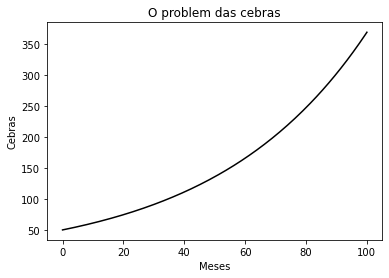

In [12]:
plt.plot(sol.t, sol.y[0], c='k')
plt.title("O problem das cebras")
plt.ylabel("Cebras")
plt.xlabel("Meses")
plt.show()

As cousas non pintan ben. Haberá que facer eleccións difíciles.

## A solución natural¶
Pensemos nos enimigos naturais das cebras. Intentaremos regular a poboación das cebras metendo lións no seu medio, pero temos que asugurarnos de que lións non comerán todas as cebras (só quere manter a poboación controlada, non exterminada).

Usaremos, por tanto o modelo [modelo Predator-Prey](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).

As cebras seguirán tendo bebés a taxa $\alpha$.  
Un lión atrapará e comerá cada 100 cebras que vexa.  
O número de cebras que ve un león depende da poboación de cebras, denotaremos como $\beta$ a taxa á que un león atopa unha única cebra nun mes.  
Por cada 5 cebras que comen os leóns nace un lionciño.  
Os leóns morren de vellez a un ritmo de $\gamma$.  

Usaremos $x$ para indicar o número de lións e $z$ para o número de cebras. Agora, a cantidade que cambia a poboación de cebras cada mes é $\Delta z(z,x) = \alpha z− \beta 100 x z$. A cantidade que cambia a poboación de leóns cada mes é $\Delta x(x,z) = \beta500xz − \gamma x.

Para resolver este problema, podemos utilizar un vector $y=[x,z]T$, e o seguinte sistema de ecuacións diferenciais ordinarias:
  
$$
\begin{align*}
y′_0(t)= \frac {\beta} {500} y_0 y_1 − \gamma y_0 \\
y′_1(t) = \alpha y_1 − \frac {\beta} {100} y_0 y_1
\end{align*}
$$

## Aparytado 1.

Estimamos que $\gamma$ é 0.02 e $\beta$ é 1.0.

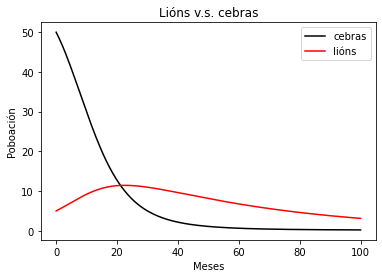

In [13]:
z0 = 50
x0 = 5
alpha = 0.02
beta = 1.0
gamma = 0.02

y0 = np.array([x0, z0])
f = lambda t, y : np.array([
    -gamma*y[0] + beta/500 * y[0]*y[1],
    alpha*y[1] - beta/100 * y[0]*y[1]
] )

t_eval = np.linspace(0, 100, 200)

sol = solve_ivp(f, t_span, y0, t_eval=t_eval)

    
plt.plot(sol.t, sol.y[1], label="cebras", c='k')
plt.plot(sol.t, sol.y[0], label="lións", c='r')
plt.title("Lións v.s. cebras")
plt.ylabel("Poboación")
plt.xlabel("Meses")
plt.legend()
plt.show()

Mala cousa! Pronto comeranse os lións ás cebras e quedarás cunha manada de leóns famentos. Se facemos uns xardíns para facilitar que as cebras se escondan, poderíamos supor que $\beta = 0.3$.

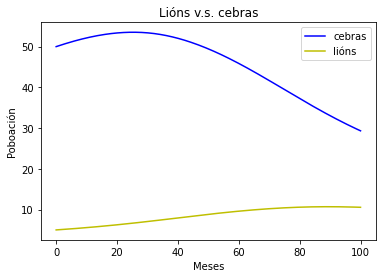

In [16]:
z0 = 50
x0 = 5
alpha = 0.02
beta = 0.3
gamma = 0.02

y0 = np.array([x0, z0])
f = lambda t, y : np.array([
    -gamma*y[0] + beta/500 * y[0]*y[1],
    alpha*y[1] - beta/100 * y[0]*y[1]
] )

t_eval = np.linspace(0, 100, 200)

sol = solve_ivp(f, t_span, y0, t_eval=t_eval)

    
plt.plot(sol.t, sol.y[1], label="cebras", c='b')
plt.plot(sol.t, sol.y[0], label="lións", c='y')
plt.title("Lións v.s. cebras")
plt.ylabel("Poboación")
plt.xlabel("Meses")
plt.legend()
plt.show()

Parece un pouco mellor. Qué pasa se miramos un pouco mais aló no tempo?

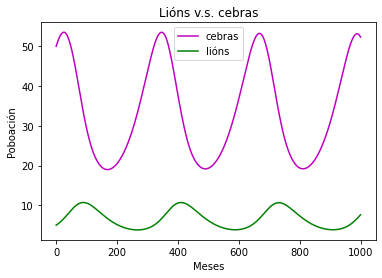

In [17]:
z0 = 50
x0 = 5
alpha = 0.02
beta = 0.3
gamma = 0.02


y0 = np.array([x0, z0])
f = lambda t, y : np.array([
    -gamma*y[0] + beta/500 * y[0]*y[1],
    alpha*y[1] - beta/100 * y[0]*y[1]
] )

t_eval = np.linspace(0, 1000, 2000)
t_span = (0, 1000)

sol = solve_ivp(f, t_span, y0, t_eval=t_eval)


plt.plot(sol.t, sol.y[1], label="cebras", c='m')
plt.plot(sol.t, sol.y[0], label="lións", c='g')
plt.title("Lións v.s. cebras")
plt.ylabel("Poboación")
plt.xlabel("Meses")
plt.legend()
plt.show()